# Declaration of Originality

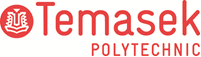

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Goh Yi Rong, Edwin (2401058I)
* Tutorial Group                : PC01
* Tutor						    : Ruchir Srivastava
* Submission Date               : 13/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [26]:
## Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Build a classification model that can help psychologists, counselors, and educational institutions identify students who are at risk of depression based on their academic, lifestyle and personal factors. This will support early intervention based on data available to institutions and better, more objective identification of students at risk rather than relying on subjective factors and self reporting, which are unreliable. Students identified as potentially depressed can then be directed to professionals for diagnosis. This project aims to build a model that will use the strongest predictors of depression to identify if a student likely has depression in an efficient and accurate way.

Potential considerations: Privacy issues and lack of student consent for this model to be run on them. These should be reviewed by an AI safety/ethics board before the model is deployed in a real environment.

# 2. Data Understanding

## 2.1 Load dataset

We use pandas for our EDA as it provides many convenient functions for data analysis and integrates nicely with other modules such as matplotlib and seaborn. Since our dataset is in CSV format, we use the read_csv() method to load it into a DataFrame object. 

In [8]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv(r"student_depression_dataset.csv")

## 2.2 Summary Statistics

In this section, we get the summary statistics about the data in the dataset. This will tell us about the type of variables that we are working with, which will help us understand how we can graph the data, what we must do to pre-process it, and how we can use them for the model later on.

In [10]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Age, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Work/Study Hours are numeric features.

id, Gender, City, Profession, Sleep Duration, Dietary Habits, Degree, Suicidal Thoughts, Financial Stress, and Family History are categorical features. 

id displays a int64 data type but it is actually categorical as the numbers does not have numerical meaning. Sleep duration appears to be categorical/binned.

The target variable, depression, is also categorical.

#### Check for missing data

Missing data can cause bias and accuracy issues. It is important to check whether there are any missing data in the dataset before we begin as this will improve data quality, make analysis easier and enhance the model's performance. [\[1\]](https://www.geeksforgeeks.org/data-analysis/handling-missing-values-machine-learning/) 

In [ ]:
print(df.isnull().sum())
print(df.isna().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               

In [ ]:
## Describe data distribution

# It provides summary statistics for numerical columns by default, such as count, mean, standard deviation, min, max, and quartiles. By using include="all", it also provides information about categorical columns, such as unique values, top value, and frequency. This helps us understand the overall distribution and characteristics of the data in the dataset.

df.describe(include="all")

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

It is important for us to understand the distribution of data in order to know what biases are likely to result from a model naively trained on it, and hence what kind of pre-processing we need to do. It also helps with feature selection.

### 2.3.1.1 Understanding distribution of target

We need to understand the distribution of the target because an unbalanced dataset because an unbalanced dataset can cause models to overperform on the majority [class and underperform on the minority class. For instance, the model might produce false positives or false negatives. [\[2\]](https://www.geeksforgeeks.org/machine-learning/handling-imbalanced-data-for-classification/)

<Axes: xlabel='Depression'>

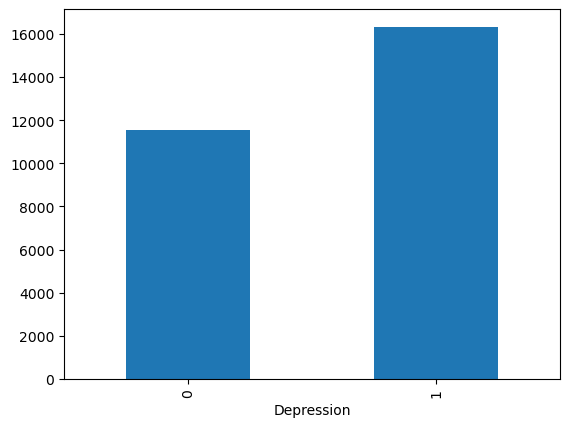

In [ ]:
# Understanding distribution of target
# Depression values are currently 1s and 0s, which are treated as numbers by pandas.
# We'll take the counts of 0s and 1s for now before we clean the dataset

df["Depression"].value_counts().sort_index().plot(kind="bar")

This dataset is imbalanced, as there are approximately 4000 more positive than negative cases. There is significantly more data for students with depression than without. This can cause the model to be too sensitive and report that more students are depressed than actually are (false positives). This is harmful to our goal of accurately reporting which students are likely to have depression for follow-up. 

### 2.3.1.2 Understanding distribution of features
In this section, we will look at the distribution of the features in the dataset. This will help us understand how to pre-process the data and what kind of model to use. For instance, if a feature is highly skewed, we might want to apply a log transformation to it before using it in a model. If a feature is categorical, we might want to one-hot encode it before using it in a model. (AI)


#### CGPA

<Axes: >

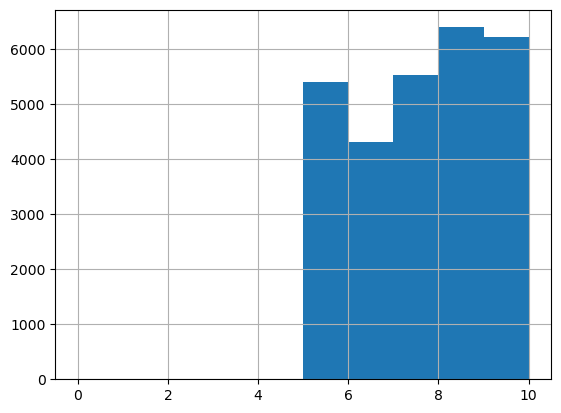

In [ ]:
# Understanding distribution of features
df["CGPA"].hist()


#### 

### 2.3.2 Understanding relationship between variables

<Axes: >

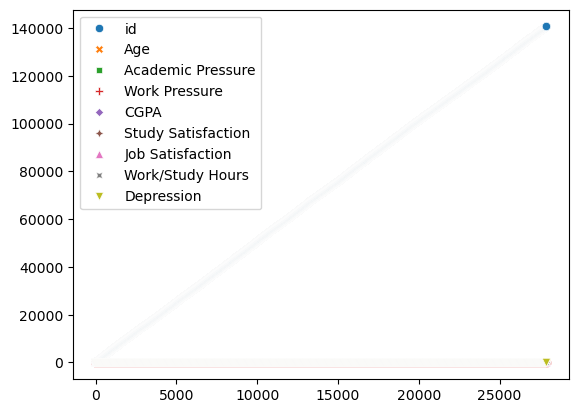

In [ ]:
## Understanding relationship between variables
sns.scatterplot(data = df)

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection